In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()
os.chdir('..')

In [3]:
from dataset.dataloader import Dataloader

In [4]:
data = Dataloader(
    listing_path = f'dataset/listings',
    comments_path = f'dataset/comments',
)
original_df = data.getListings()

In [5]:
# Crate a list for removing unnecessary columns from the dataset
scores_conlumns = ['price', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

In [6]:
# Remove the unnecessary columns from the dataset.
df = original_df[scores_conlumns]
df['price'] = df.price.apply(lambda p: float(p.replace('$', '').replace(',','')))
df.columns

/tmp/ipykernel_70064/3073782187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df.price.apply(lambda p: float(p.replace('$', '').replace(',','')))


Index(['price', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

# Basic analysis

In [7]:
df.head()

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,69.0,4.89,4.93,4.99,4.97,4.98,4.69,4.81
1,325.0,4.76,4.72,4.79,4.90,4.92,4.93,4.60
2,244.0,4.75,4.83,4.69,4.86,4.78,4.85,4.62
3,244.0,4.94,4.91,4.92,4.98,4.99,4.91,4.84
4,220.0,4.88,4.88,4.64,4.92,4.88,4.79,4.75


In [8]:
df.describe()

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,6998.000000,6316.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000
mean,223.038868,4.818040,4.846193,4.759781,4.878554,4.890019,4.788021,4.640970
std,181.018460,0.281488,0.244457,0.323061,0.233375,0.234914,0.252756,0.321297
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,130.000000,4.750000,4.790000,4.670000,4.850000,4.870000,4.670000,4.500000
50%,186.000000,4.890000,4.920000,4.860000,4.950000,4.970000,4.860000,4.690000
75%,270.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.830000
max,7900.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Distribution of a numeric columns using a histogram

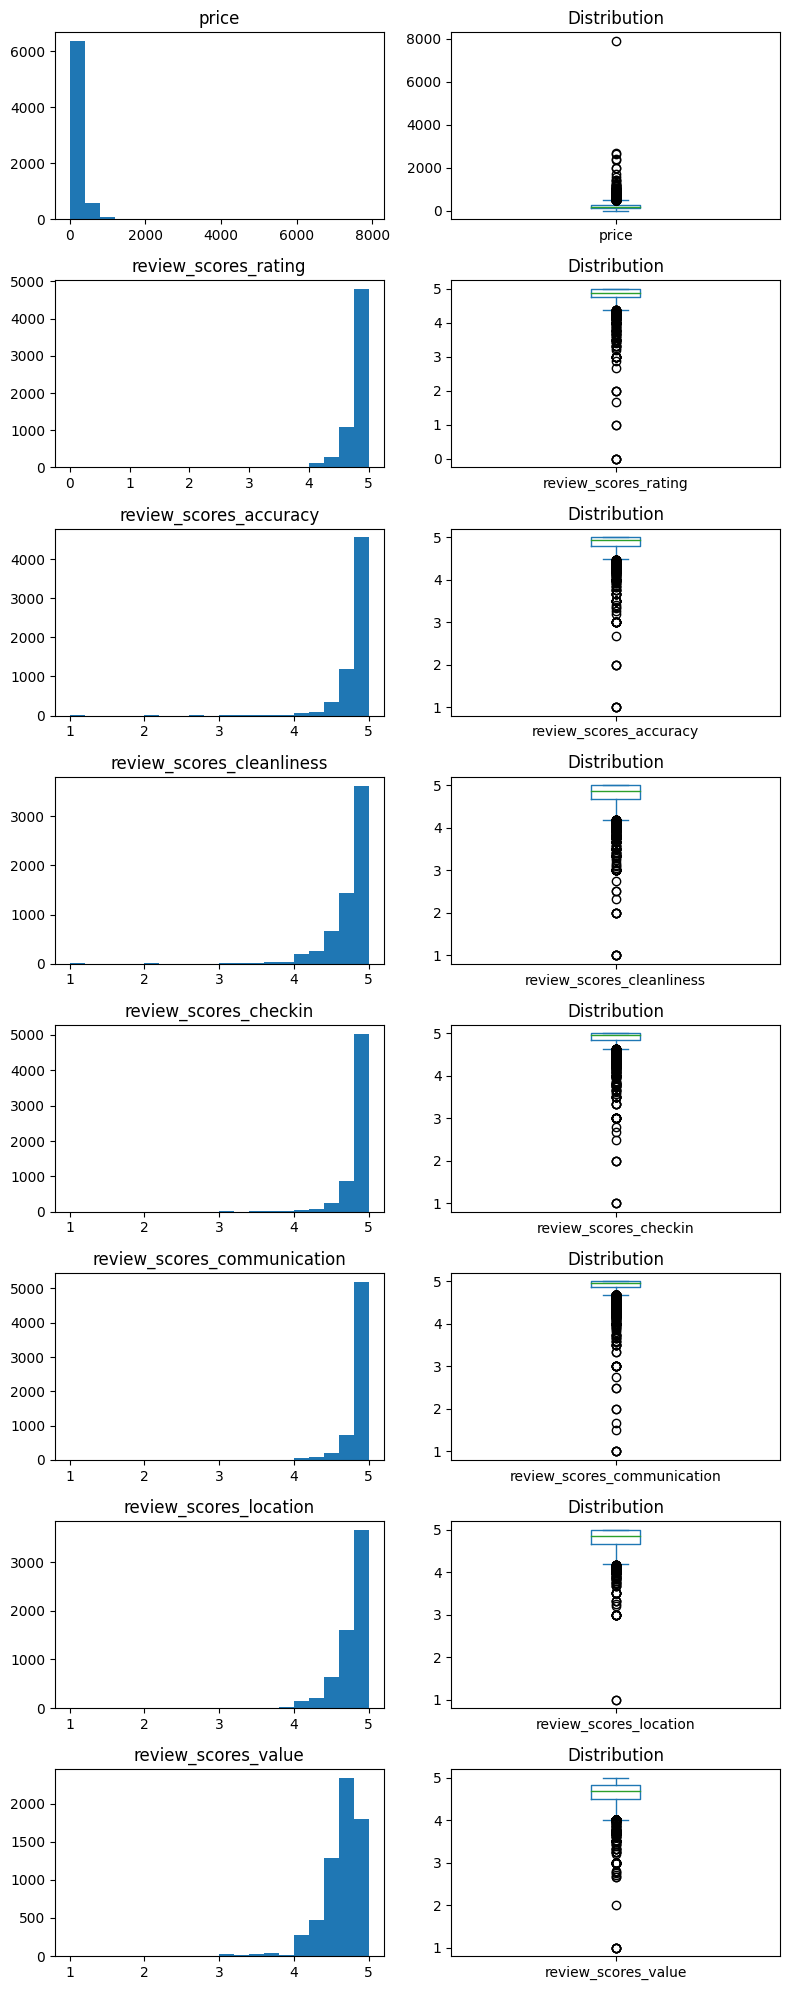

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(8, 20))

# Loop through each column and plot a histogram
for i, col in enumerate(numerical_cols):
    data = df[col].dropna()  # Remove missing values from the data
    axes[i][0].hist(data, bins=20)
    axes[i][0].set_title(col)

    plot = data.plot(kind = 'box', ax = axes[i][1])
    plot.set_title('Distribution')

plt.tight_layout()
plt.show()


## Find a good cutout for the prices

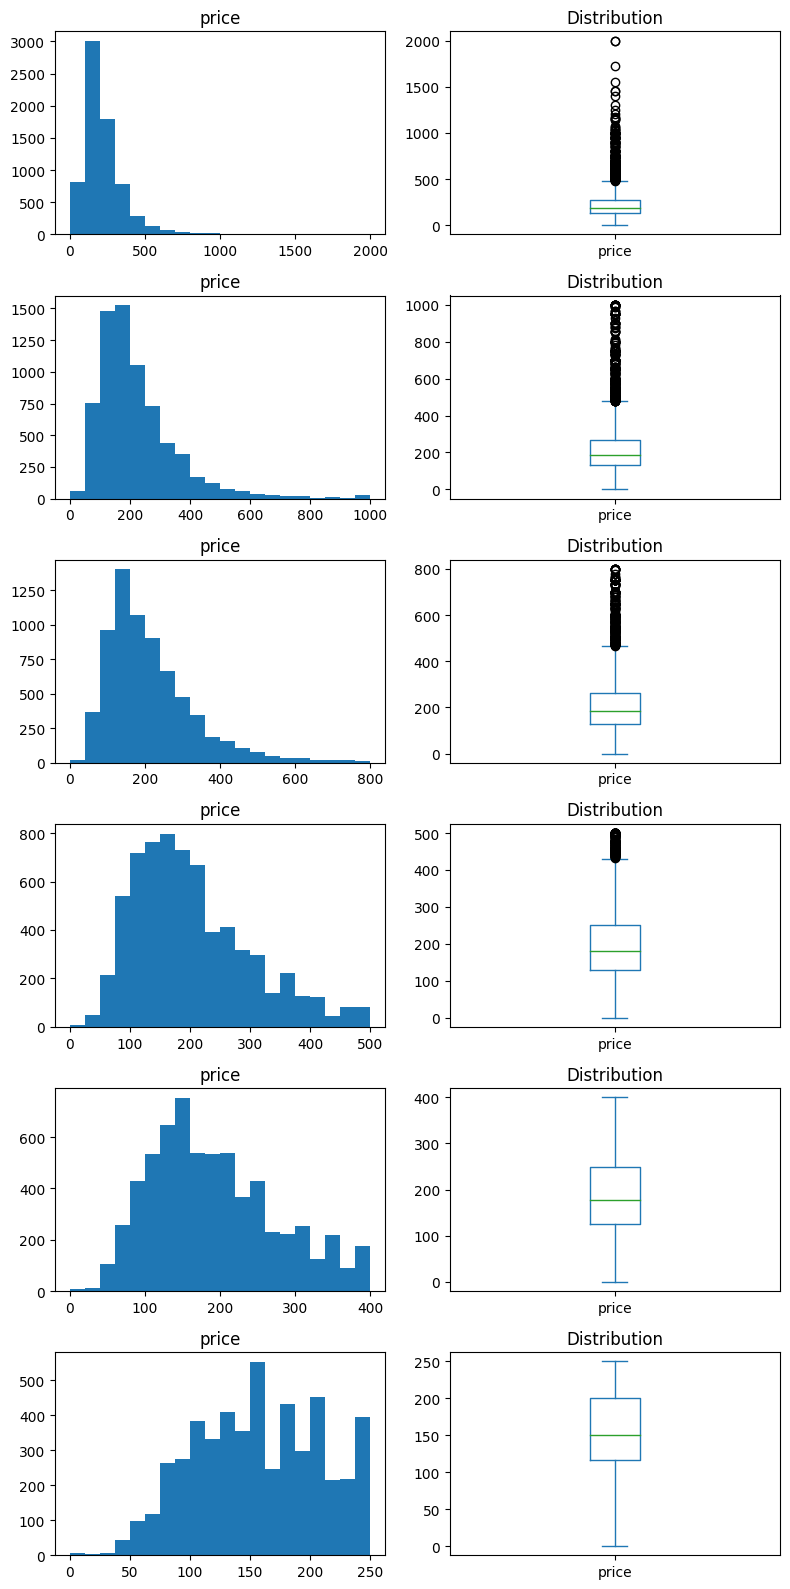

In [21]:
# Select only the numerical columns
price_cols = df.price.dropna()

limits_up = [2000, 1000, 800, 500, 400, 250]

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(limits_up), ncols=2, figsize=(8, 16))
for i, l in enumerate(limits_up):
    data = price_cols[price_cols <= l] # Remove missing values from the data
    axes[i][0].hist(data, bins=20)
    axes[i][0].set_title("price")

    plot = data.plot(kind = 'box', ax = axes[i][1])
    plot.set_title('Distribution')

plt.tight_layout()
plt.show()

## Find a good cutout for the scores

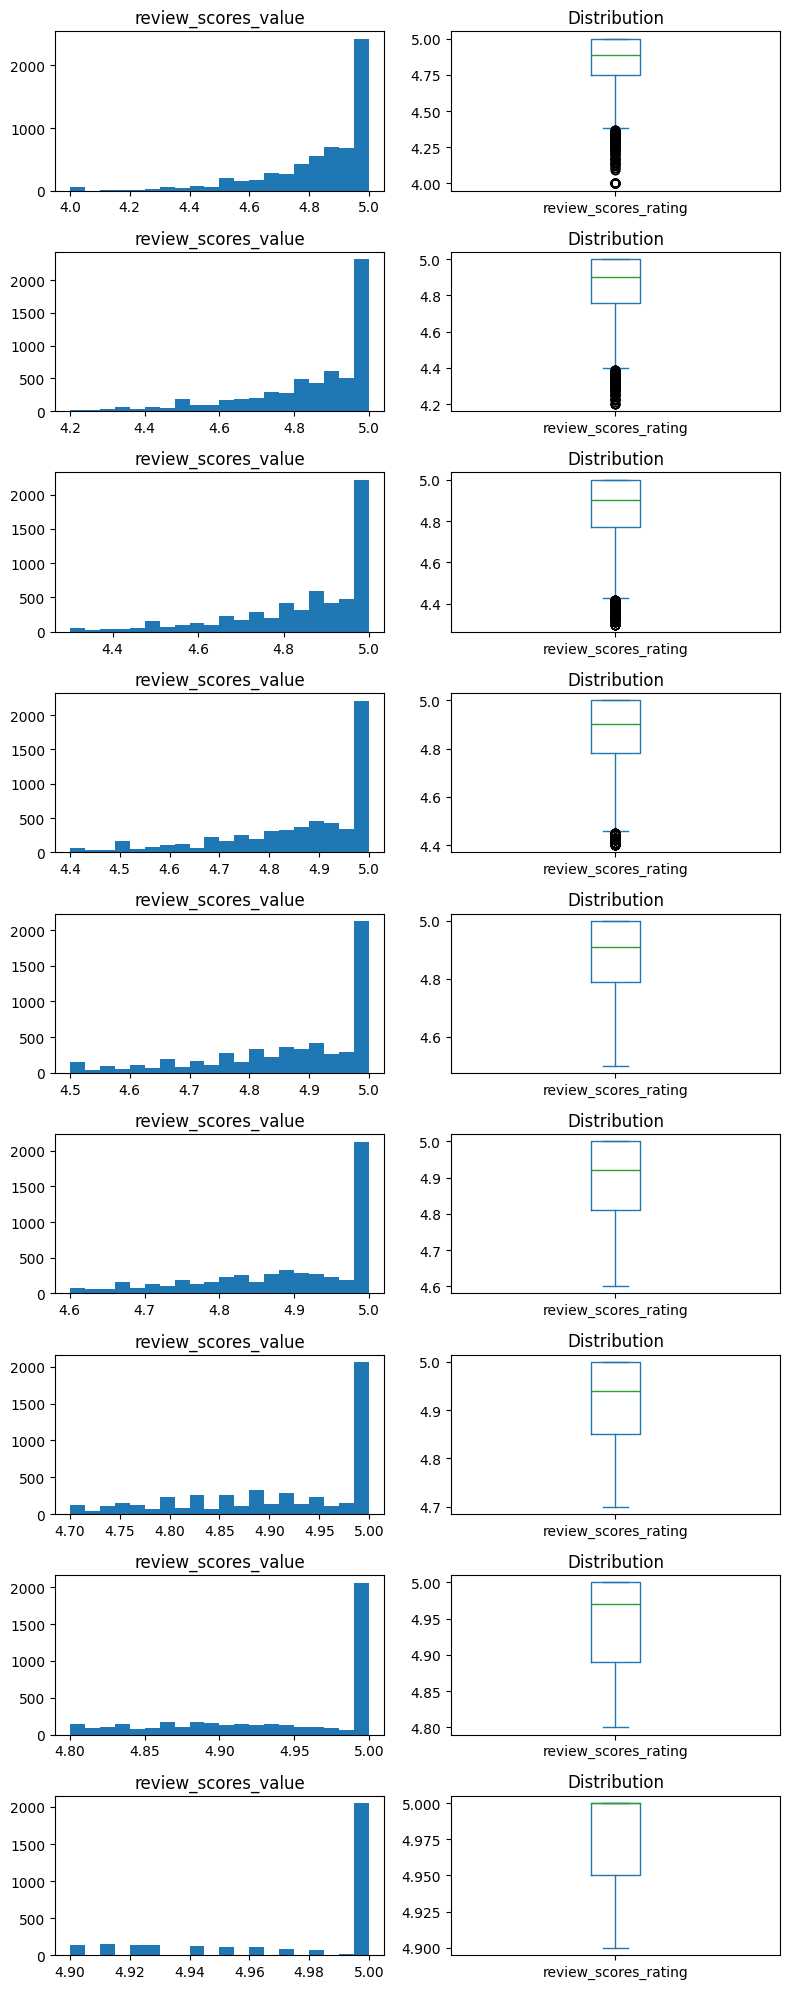

In [16]:
# Select only the numerical columns
score_cols = df.review_scores_rating.dropna()

limits_up = [4, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9 ]

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(limits_up), ncols=2, figsize=(8, 20))
for i, l in enumerate(limits_up):
    data = score_cols[score_cols >= l] # Remove missing values from the data
    axes[i][0].hist(data, bins=20)
    axes[i][0].set_title(col)

    plot = data.plot(kind = 'box', ax = axes[i][1])
    plot.set_title('Distribution')

plt.tight_layout()
plt.show()

Since we have a lot of values on 5 we want to try to reprint the distributions removing the score equal to 5

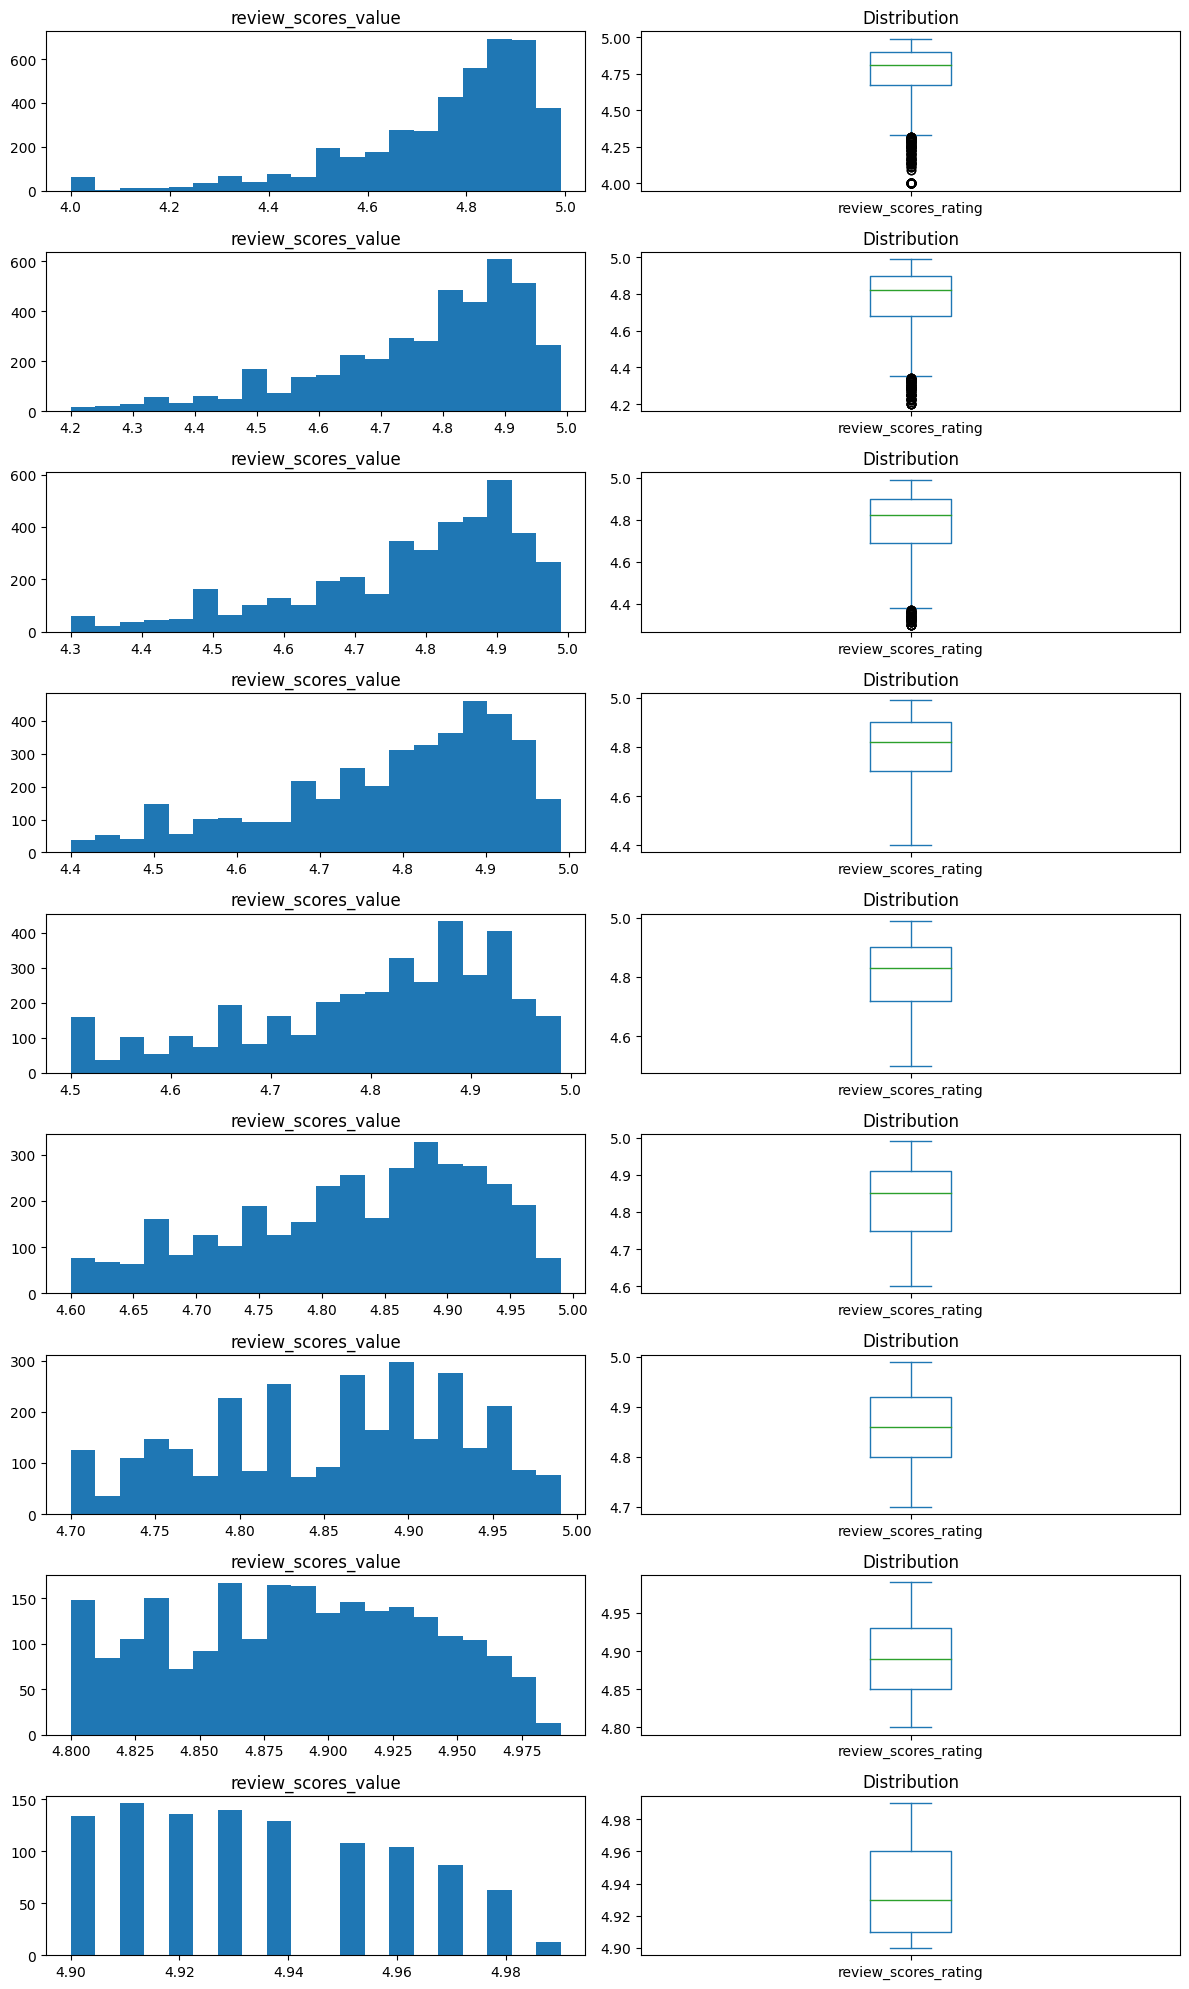

In [11]:
# Select only the numerical columns
score_cols = df.review_scores_rating.dropna()

limits_up = [4, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9 ]

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(limits_up), ncols=2, figsize=(12, 20))
for i, l in enumerate(limits_up):
    data = score_cols[score_cols >= l][score_cols < 5] # Remove missing values from the data
    axes[i][0].hist(data, bins=20)
    axes[i][0].set_title(col)

    plot = data.plot(kind = 'box', ax = axes[i][1])
    plot.set_title('Distribution')

plt.tight_layout()
plt.show()

In [12]:
score_cols.describe()

count    6316.000000
mean        4.818040
std         0.281488
min         0.000000
25%         4.750000
50%         4.890000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

In [13]:
score_cols[score_cols == 5].describe()

count    2049.0
mean        5.0
std         0.0
min         5.0
25%         5.0
50%         5.0
75%         5.0
max         5.0
Name: review_scores_rating, dtype: float64

We can see that more than 2000 listing out of 6316 (32%) of the listing have maximum rating